<a href="https://colab.research.google.com/github/Rosh-pvr/Deep_Learning/blob/main/Deep_Learning_research_paper.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install tensorflow keras scikit-learn pandas numpy matplotlib

**Uploading Data**

In [7]:
from google.colab import files
import pandas as pd

# Upload the CSV file
uploaded = files.upload()

# Load dataset
df = pd.read_csv("sample_documents.csv")  # Replace with your filename
print(df.head())

Saving sample_documents.csv to sample_documents (1).csv
   id                                               text        label
0   1  Deep learning models improve document clusteri...           AI
1   2  Convolutional Neural Networks (CNNs) are effec...           AI
2   3  Hybrid algorithms combine bond energy optimiza...           ML
3   4  Climate change impacts global weather patterns...  Environment
4   5  Renewable energy sources like solar and wind r...  Environment


**Preprocess the text**

In [8]:
from sklearn.feature_extraction.text import TfidfVectorizer

# TF-IDF Vectorization
vectorizer = TfidfVectorizer(max_features=5000)
X = vectorizer.fit_transform(df["text"])
print("TF-IDF shape:", X.shape)

TF-IDF shape: (10, 84)


**CNN Extraction Feature**

In [9]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, GlobalMaxPooling1D, Dense

# Reshape for CNN input
X_dense = X.toarray()
X_reshaped = X_dense.reshape(X_dense.shape[0], X_dense.shape[1], 1)

# Define CNN model
model = Sequential([
    Conv1D(128, 5, activation='relu', input_shape=(X_reshaped.shape[1], 1)),
    GlobalMaxPooling1D(),
    Dense(64, activation='relu')
])

# Extract features
features = model.predict(X_reshaped)
print("Features shape:", features.shape)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 235ms/step
Features shape: (10, 64)


**Clustering with Bond Energy**

In [10]:
from sklearn.cluster import KMeans

# Step 1: Initial clustering (K-Means)
n_clusters = 4  # Adjust based on your data
kmeans = KMeans(n_clusters=n_clusters)
labels = kmeans.fit_predict(features)

# Step 2: Refine clusters (simplified bond energy)
centroids = kmeans.cluster_centers_
for i in range(len(features)):
    distances = np.linalg.norm(features[i] - centroids, axis=1)
    labels[i] = np.argmin(distances)  # Reassign to closest centroid

df["predicted_cluster"] = labels
print(df[["text", "predicted_cluster"]].head())

                                                text  predicted_cluster
0  Deep learning models improve document clusteri...                  1
1  Convolutional Neural Networks (CNNs) are effec...                  1
2  Hybrid algorithms combine bond energy optimiza...                  1
3  Climate change impacts global weather patterns...                  0
4  Renewable energy sources like solar and wind r...                  2


**Evaluate and Visualize**

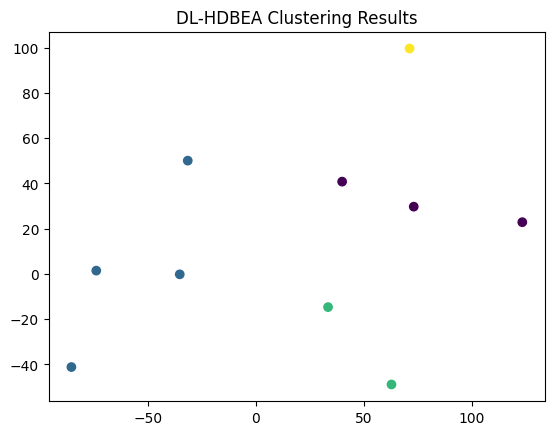

In [12]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

# Adjust perplexity based on dataset size
n_samples = features.shape[0]
perplexity = min(5, n_samples - 1)  # Use 5 or (n_samples - 1), whichever is smaller

# Run t-SNE
tsne = TSNE(n_components=2, perplexity=perplexity, random_state=42)
features_2d = tsne.fit_transform(features)

# Plot
plt.scatter(features_2d[:, 0], features_2d[:, 1], c=labels, cmap='viridis')
plt.title("DL-HDBEA Clustering Results")
plt.show()